# Fitting of Raman peaks with Gaussian, Lorentzian, and Voigt functions

## Lightnovo ApS

### info@lightnovo.com

Copyright 2024 Lightnovo ApS

Licensing: MIT license

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.optimize import curve_fit
import scipy as sp

In [2]:
sns.set(font_scale=1.5)
sns.set_style('whitegrid')

# Diamond 1332 $cm^{-1}$ peak

In [3]:
f='Data/diamond_785nm_10x_Data.tsv' #file name

In [4]:
df = pd.read_csv(f, sep='\t', header =6)

In [5]:
df.rename(columns={'Wavenumber [cm^-1]':'Raman Shift, cm-1', 'Raman [%]':'Intensity, %'}, inplace = True)

In [6]:
df.dropna(inplace = True)

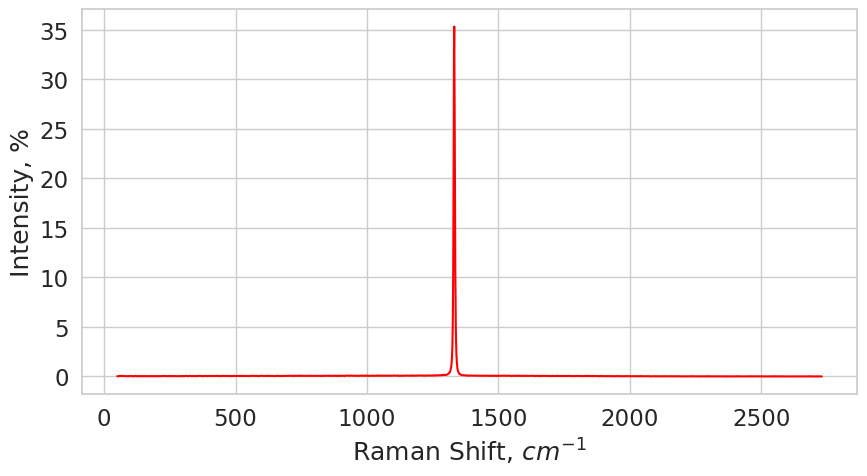

In [7]:
plt.figure(figsize = (10,5))
sns.lineplot(df, x = "Raman Shift, cm-1", y = "Intensity, %", color = 'red')
plt.xlabel(r'Raman Shift, $cm^{-1}$')
plt.savefig('diamond.png', dpi =300, bbox_inches='tight')
plt.savefig("diamond.svg", format='svg', dpi = 300, bbox_inches='tight')

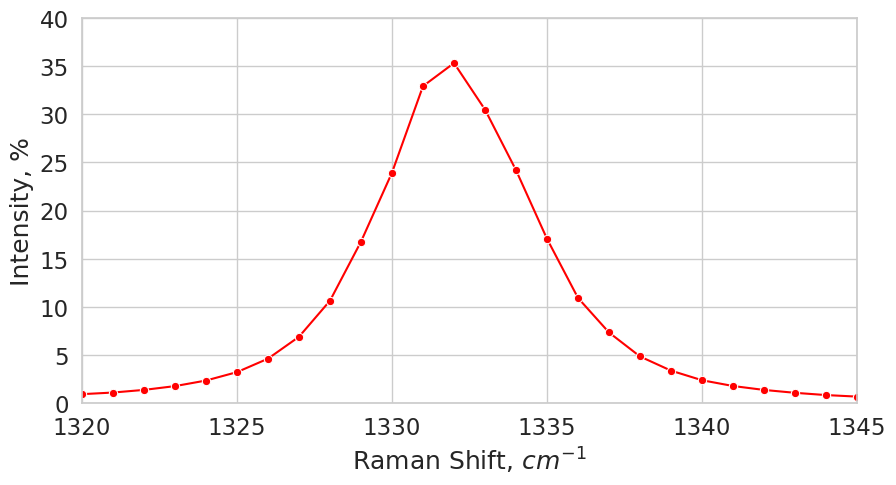

In [8]:
plt.figure(figsize = (10,5))
sns.lineplot(df, x = "Raman Shift, cm-1", y = "Intensity, %", marker ="o", color = 'red')
plt.xlabel(r'Raman Shift, $cm^{-1}$')
plt.xlim(1320,1345)
plt.ylim(0,40)
plt.savefig('diamond_01.png', dpi =300, bbox_inches='tight')
plt.savefig("diamond_01.svg", format='svg', dpi = 300, bbox_inches='tight')

In [9]:
xmin = 1320
xmax = 1345

df1 = df[(df["Raman Shift, cm-1"]>=xmin)&(df["Raman Shift, cm-1"]<=xmax)]

In [10]:
x1 = np.arange(xmin,xmax,0.1)

# Gaussian fit

In [11]:
def gauss(x, A0, A, x0, sigma):
    return A0 + A * np.exp(-(x - x0) ** 2 / (2 * sigma ** 2))

In [12]:
def gauss_fit(x, y):
    mean = sum(x * y) / sum(y)
    sigma = np.sqrt(sum(y * (x - mean) ** 2) / sum(y))
    popt, pcov = curve_fit(gauss, x, y, p0=[min(y), max(y), mean, sigma])
    return popt

In [13]:
popt1 = gauss_fit(df1["Raman Shift, cm-1"],df1["Intensity, %"])

In [14]:
y1 = gauss(x1, *popt1)

In [15]:
df_fit_gauss = pd.DataFrame()
df_fit_gauss["Raman Shift, cm-1"] = x1.tolist()
df_fit_gauss["Intensity, %"] = y1.tolist()

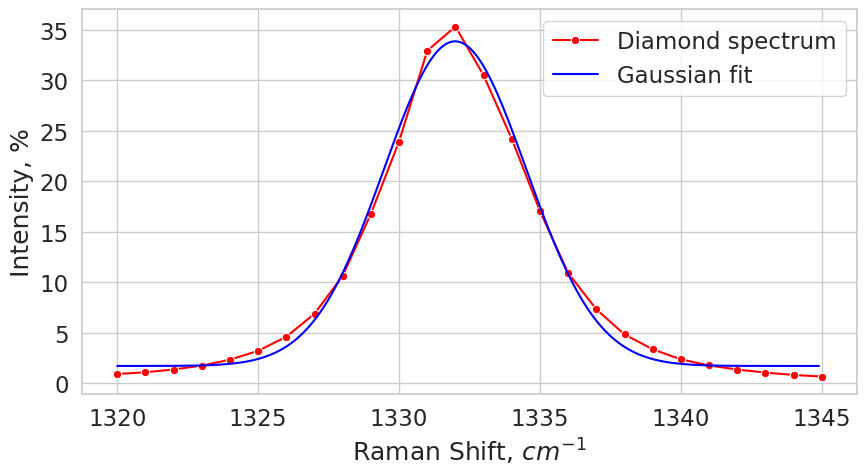

In [16]:
plt.figure(figsize = (10,5))
sns.lineplot(df1, x = "Raman Shift, cm-1", y = "Intensity, %", marker ="o", color = 'red', label = "Diamond spectrum")
sns.lineplot(df_fit_gauss, x = "Raman Shift, cm-1", y = "Intensity, %", color = 'blue', label = "Gaussian fit")
plt.xlabel(r'Raman Shift, $cm^{-1}$')
plt.savefig('diamond_gauss_fit.png', dpi =300, bbox_inches='tight')

In [17]:
popt1

array([   1.71727347,   32.1471818 , 1331.99027879,    2.52429369])

In [18]:
#FWHH
FWHH_gauss = 2*np.sqrt(2*np.log(2))*popt1[3]
FWHH_gauss

5.944257389397014

# Lorentzian fit

In [19]:
def lorentz( x, A0, A, x0, gamma ):
    return A0 + A * gamma**2 / ( gamma**2 + ( x - x0 )**2)

In [20]:
p0 = [0, 50, 1330, 1]

def lorentz_fit(x, y):
    popt, pcov = curve_fit(lorentz, x, y, p0=p0)
    return popt

In [21]:
popt2 = lorentz_fit(df1["Raman Shift, cm-1"],df1["Intensity, %"])

In [22]:
y2 = lorentz(x1, *popt2)

In [23]:
df_fit_lorentz = pd.DataFrame()
df_fit_lorentz["Raman Shift, cm-1"] = x1.tolist()
df_fit_lorentz["Intensity, %"] = y2.tolist()

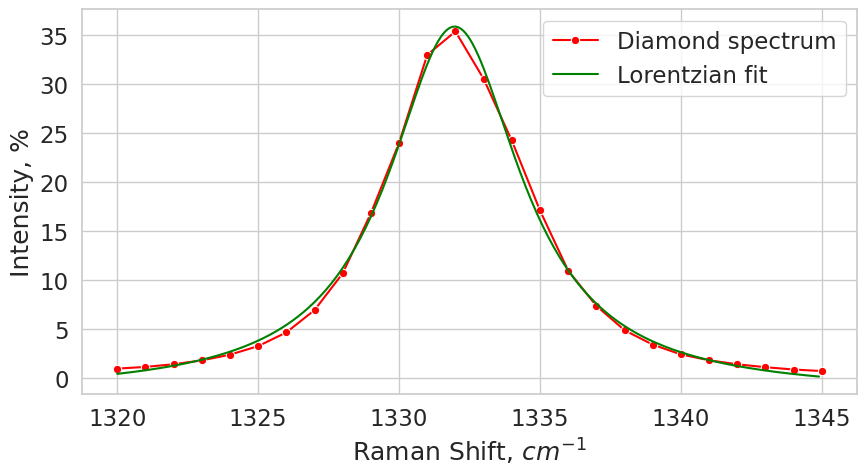

In [24]:
plt.figure(figsize = (10,5))
sns.lineplot(df1, x = "Raman Shift, cm-1", y = "Intensity, %", marker ="o", color = 'red', label = "Diamond spectrum")
sns.lineplot(df_fit_lorentz, x = "Raman Shift, cm-1", y = "Intensity, %", color = 'green', label = "Lorentzian fit")
plt.xlabel(r'Raman Shift, $cm^{-1}$')
plt.savefig('diamond_lorentz_fit.png', dpi =300, bbox_inches='tight')

In [25]:
popt2

array([  -1.6468647 ,   37.47004432, 1331.97228931,    2.86785954])

In [26]:
#FWHH
FWHH_lorentz = 2*popt2[3]
FWHH_lorentz

5.735719075285988

# Voigt fit

In [27]:
from scipy.special import wofz

In [28]:
def voigt(x, A0, A, x0, sigma, gamma):
    return A0 + A * np.real(wofz((x - x0 + 1j*gamma)/sigma/np.sqrt(2))) / sigma /np.sqrt(2*np.pi)

In [29]:
p0 = [0, 50, 1330, 1,1]

def voigt_fit(x, y):
    popt, pcov = curve_fit(voigt, x, y, p0=p0)
    return popt

In [30]:
popt3 = voigt_fit(df1["Raman Shift, cm-1"],df1["Intensity, %"])

In [31]:
y3 = voigt(x1, *popt3)

In [32]:
df_fit_voigt = pd.DataFrame()
df_fit_voigt["Raman Shift, cm-1"] = x1.tolist()
df_fit_voigt["Intensity, %"] = y3.tolist()

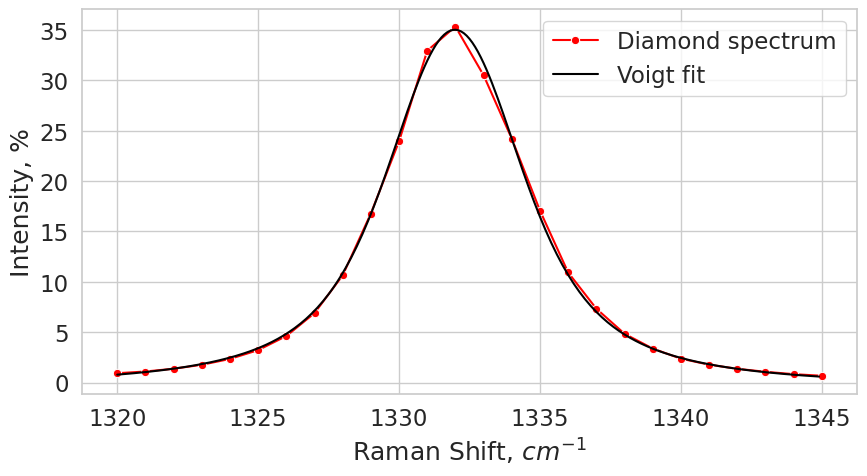

In [33]:
plt.figure(figsize = (10,5))
sns.lineplot(df1, x = "Raman Shift, cm-1", y = "Intensity, %", marker ="o", color = 'red', label = "Diamond spectrum")
sns.lineplot(df_fit_voigt, x = "Raman Shift, cm-1", y = "Intensity, %", color = 'black', label = "Voigt fit")
plt.xlabel(r'Raman Shift, $cm^{-1}$')
plt.savefig('diamond_voigt_fit.png', dpi =300, bbox_inches='tight')

In [34]:
popt3

array([-5.58384753e-01,  2.92052889e+02,  1.33198071e+03,  1.30588409e+00,
        2.05520352e+00])

In [35]:
# FWHH

fL = 2*abs(popt3[4])
fG = 2*np.sqrt(2*np.log(2))*popt3[3]

FWHH_voigt = 0.5346 * abs(fL)  + np.sqrt( 0.2166 * fL**2 + fG**2)

print(abs(fL))
print(fG)
print(FWHH_voigt)

4.1104070386327995
3.075122027902371
5.819015669213499


# Comparison of fitting methods and error analysis

In [36]:
df_fit_gauss["Intensity, %"].max()

33.864216889365345

In [37]:
df_fit_lorentz["Intensity, %"].max()

35.81968160559178

In [38]:
df_fit_voigt["Intensity, %"].max()

35.004751784344045

## Gaussian fit

In [39]:
error1 = pd.DataFrame()
error1["Raman Shift, cm-1"] = df1["Raman Shift, cm-1"]
error1["Error, %"] =  gauss(df1["Raman Shift, cm-1"], *popt1) - df1["Intensity, %"]

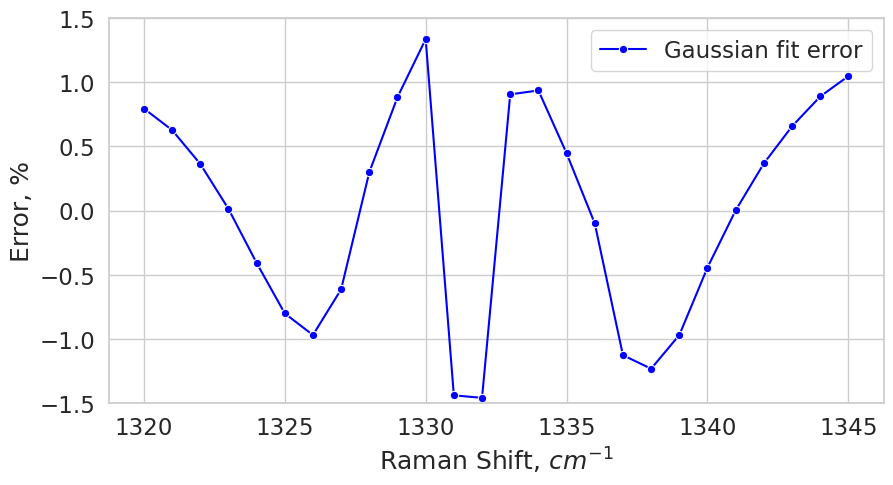

In [40]:
plt.figure(figsize = (10,5))
sns.lineplot(error1, x = "Raman Shift, cm-1", y = "Error, %", marker ="o", color = 'blue', label = "Gaussian fit error")
plt.ylim(-1.5,1.5)
plt.xlabel(r'Raman Shift, $cm^{-1}$')
plt.savefig('diamond_gauss_fit_error.png', dpi =300, bbox_inches='tight')

In [41]:
RMSE_gauss = np.sqrt( np.sum(error1["Error, %"]**2)/error1["Error, %"].size )

In [42]:
RMSE_gauss

0.8418875295916383

## Lorentzian fit

In [43]:
error2 = pd.DataFrame()
error2["Raman Shift, cm-1"] = df1["Raman Shift, cm-1"]
error2["Error, %"] =  lorentz(df1["Raman Shift, cm-1"], *popt2) - df1["Intensity, %"]

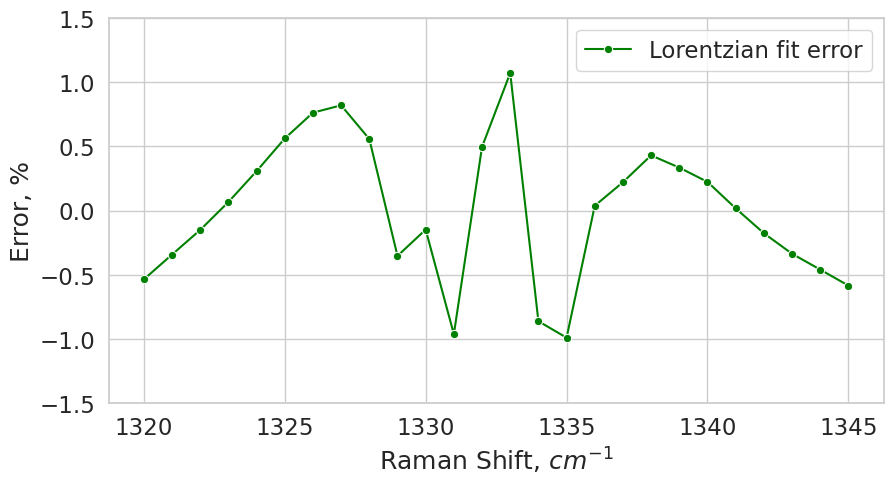

In [44]:
plt.figure(figsize = (10,5))
sns.lineplot(error2, x = "Raman Shift, cm-1", y = "Error, %", marker ="o", color = 'green', label = "Lorentzian fit error")
plt.ylim(-1.5,1.5)
plt.xlabel(r'Raman Shift, $cm^{-1}$')
plt.savefig('diamond_lorentz_fit_error.png', dpi =300, bbox_inches='tight')

In [45]:
RMSE_lorentz = np.sqrt( np.sum(error2["Error, %"]**2)/error2["Error, %"].size )

In [46]:
RMSE_lorentz

0.5440435164384887

## Voigt fit

In [47]:
error3 = pd.DataFrame()
error3["Raman Shift, cm-1"] = df1["Raman Shift, cm-1"]
error3["Error, %"] =  voigt(df1["Raman Shift, cm-1"], *popt3) - df1["Intensity, %"]
error3["Intensity, %"] = voigt(df1["Raman Shift, cm-1"], *popt3)

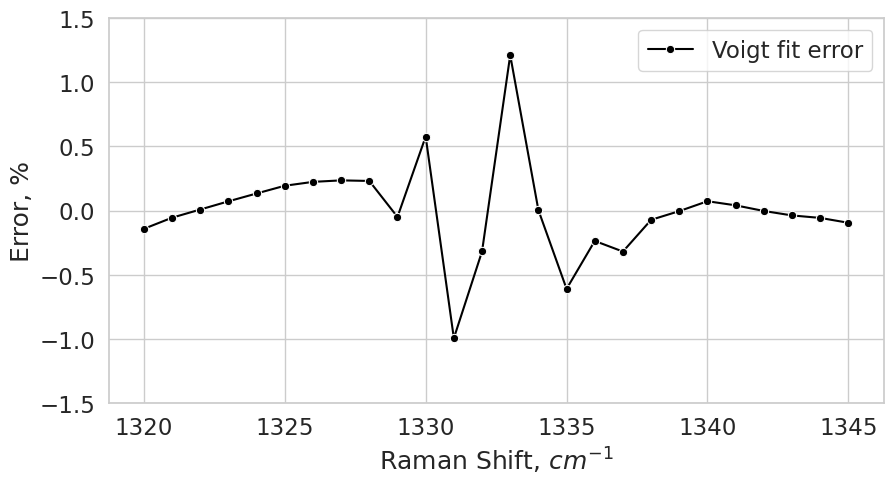

In [48]:
plt.figure(figsize = (10,5))
sns.lineplot(error3, x = "Raman Shift, cm-1", y = "Error, %", marker ="o", color = 'black', label = "Voigt fit error")
plt.ylim(-1.5,1.5)
plt.xlabel(r'Raman Shift, $cm^{-1}$')
plt.savefig('diamond_voigt_fit_error.png', dpi =300, bbox_inches='tight')

In [49]:
RMSE_voigt = np.sqrt( np.sum(error3["Error, %"]**2)/error3["Error, %"].size )

In [50]:
RMSE_voigt

0.37678745155215765

## Plot all fits and errors together

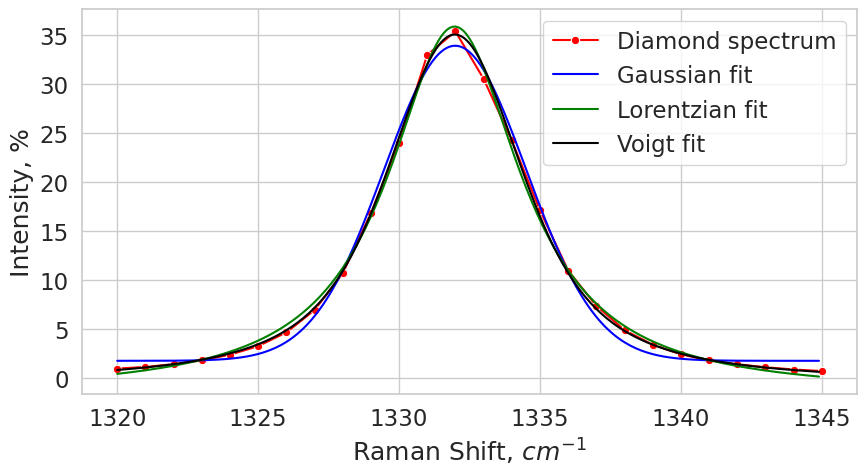

In [51]:
plt.figure(figsize = (10,5))

sns.lineplot(df1, x = "Raman Shift, cm-1", y = "Intensity, %", marker ="o", color = 'red', label = "Diamond spectrum")
sns.lineplot(df_fit_gauss, x = "Raman Shift, cm-1", y = "Intensity, %", color = 'blue', label = "Gaussian fit")
sns.lineplot(df_fit_lorentz, x = "Raman Shift, cm-1", y = "Intensity, %", color = 'green', label = "Lorentzian fit")
sns.lineplot(df_fit_voigt, x = "Raman Shift, cm-1", y = "Intensity, %", color = 'black', label = "Voigt fit")

plt.xlabel(r'Raman Shift, $cm^{-1}$')
plt.savefig('diamond_all_fits.png', dpi =300, bbox_inches='tight')

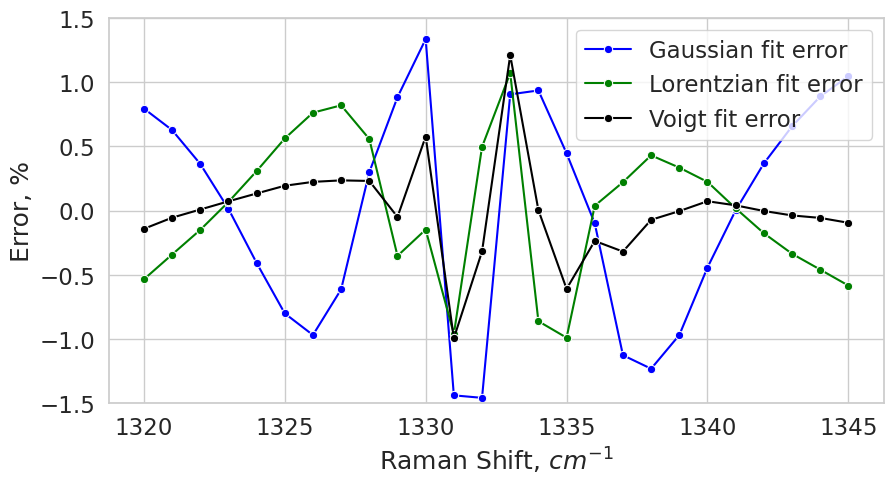

In [52]:
plt.figure(figsize = (10,5))

sns.lineplot(error1, x = "Raman Shift, cm-1", y = "Error, %", marker ="o", color = 'blue', label = "Gaussian fit error")
sns.lineplot(error2, x = "Raman Shift, cm-1", y = "Error, %", marker ="o", color = 'green', label = "Lorentzian fit error")
sns.lineplot(error3, x = "Raman Shift, cm-1", y = "Error, %", marker ="o", color = 'black', label = "Voigt fit error")

plt.ylim(-1.5,1.5)
plt.xlabel(r'Raman Shift, $cm^{-1}$')
plt.savefig('diamond_all_fit_errors.png', dpi =300, bbox_inches='tight')